In [1]:
# pip install tensorflow Pillow numpy
import tensorflow as tf
from PIL import Image
import numpy as np

Design the highpass and lowpass processing graphs.  
定义tensorflow计算图.

In [3]:
filter_size = 11
img_ph = tf.placeholder(shape=(None, None), dtype=tf.float32)
d_ph = tf.placeholder(tf.float32, name='d_ph')
lowpass_kernel = tf.exp([[(i-filter_size//2)**2+(j-filter_size//2)**2 for i in range(filter_size)] for j in range(filter_size)] / -(d_ph*d_ph))
highpass_kernel = 1 - lowpass_kernel
lowpass_kernel = tf.reshape(lowpass_kernel / tf.reduce_sum(lowpass_kernel), shape=(filter_size,filter_size,1,1))
highpass_kernel = tf.reshape(highpass_kernel / tf.reduce_sum(highpass_kernel), shape=(filter_size,filter_size,1,1))
img_ph_rs = tf.reshape(img_ph, shape=(1,tf.shape(img_ph)[0],tf.shape(img_ph)[1],1))
lowpass_result = tf.nn.conv2d(img_ph_rs, lowpass_kernel, strides=[1,1,1,1], padding='VALID')
lowpass_result = tf.reshape(lowpass_result, shape=(tf.shape(lowpass_result)[1], tf.shape(lowpass_result)[2]))
highpass_result = tf.nn.conv2d(img_ph_rs, highpass_kernel, strides=[1,1,1,1], padding='VALID')
highpass_result = tf.reshape(highpass_result, shape=(tf.shape(highpass_result)[1], tf.shape(highpass_result)[2]))

Open an image.  
打开一张图片.  

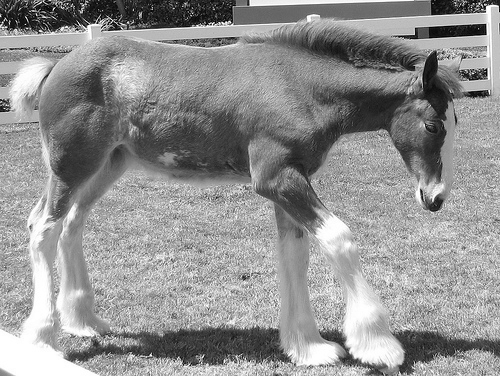

In [4]:
im_PIL = Image.open("../img/horse.jpeg").convert('L')
im_np = np.array(im_PIL, dtype=np.float32)
im_PIL

lowpass filter.  
低通滤波.  

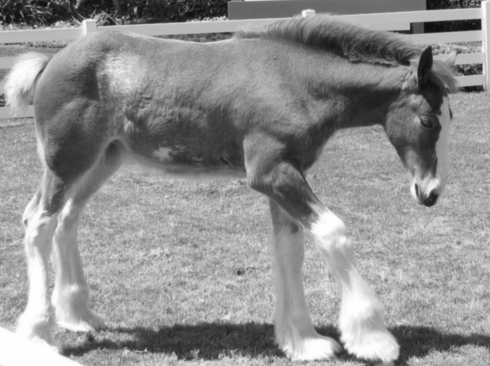

In [5]:
def lowpass_filter(img, d = 1.):
    with tf.Session() as sess:
        return sess.run(lowpass_result, feed_dict={img_ph:img, d_ph:d})
Image.fromarray(np.array(lowpass_filter(im_np), dtype=np.uint8))

Highpass filter.  
高通滤波.  

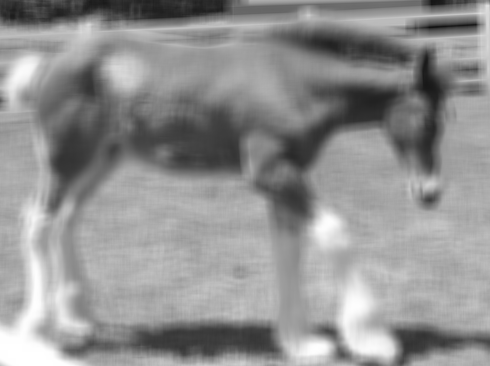

In [6]:
def highpass_filter(img, d = 5.):
    with tf.Session() as sess:
        return sess.run(highpass_result, feed_dict={img_ph:img, d_ph:d})
Image.fromarray(np.array(highpass_filter(im_np), dtype=np.uint8))